In [ ]:
!curl https://sdk.cloud.google.com | bash #download gsutil which seems to be a data transfer tol. the pipe signal moves it over to bash
!mkdir train2017 #makes a new directory
!gsutil -m rsync gs://images.cocodataset.org/train2017 train2017 #runs gsutil and gives it the directory to store.

# Onto the Mnis 

In [1]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 3s 0us/step


In [71]:
x_test.shape

(10000, 784)

In [72]:
y_train.shape

(60000,)

In [73]:
x_train = x_train.reshape(-1,28*28)

In [74]:
x_train.shape

(60000, 784)

In [75]:
x_test = x_test.reshape(-1,28*28)

In [76]:
x_test.shape

(10000, 784)

In [77]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
encoder = OneHotEncoder()

In [80]:
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [96]:
x_test[3][125]

0.5882352941176471

In [47]:
y_test_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [178]:
model = tf.keras.Sequential() #creates a sequential model

In [179]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [180]:
##adding regularisation 
tf.keras.regularizers.l1(l1=0.01) #this creates l1

In [181]:
model.add(tf.keras.layers.Dense(50, activation='relu')) #,kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
#model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))

In [182]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [183]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
model.fit(x_train, y_train_one_hot, batch_size=10000, validation_split=0.1, epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 64ms/step - loss: 2.1700 - accuracy: 0.2208 - val_loss: 1.5987 - val_accuracy: 0.5910
Epoch 2/50
6/6 [==============================] - 0s 36ms/step - loss: 1.6604 - accuracy: 0.4684 - val_loss: 1.2003 - val_accuracy: 0.7693
Epoch 3/50
6/6 [==============================] - 0s 40ms/step - loss: 1.3619 - accuracy: 0.5858 - val_loss: 0.9680 - val_accuracy: 0.8178
Epoch 4/50
6/6 [==============================] - 0s 37ms/step - loss: 1.1776 - accuracy: 0.6484 - val_loss: 0.7883 - val_accuracy: 0.8607
Epoch 5/50
6/6 [==============================] - 0s 38ms/step - loss: 1.0431 - accuracy: 0.6894 - val_loss: 0.6635 - val_accuracy: 0.8720
Epoch 6/50
6/6 [==============================] - 0s 38ms/step - loss: 0.9356 - accuracy: 0.7213 - val_loss: 0.5702 - val_accuracy: 0.8860
Epoch 7/50
6/6 [==============================] - 0s 37ms/step - loss: 0.8506 - accuracy: 0.7451 - val_loss: 0.4997 - val_accuracy: 0.8962
Epoch 8/50
6/6 [===========

In [185]:
y_test_pred = model.predict_classes(x_test)

In [186]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
accuracy_score(y_test, y_test_pred)

0.9523

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

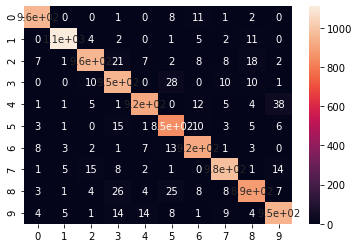

In [166]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True)

In [122]:
model.get_weights()

[array([[ 0.04875831, -0.0143535 , -0.03607001, ...,  0.0522809 ,
          0.055237  ,  0.02945469],
        [ 0.0705399 , -0.00484943, -0.03258931, ...,  0.06202694,
         -0.05409684,  0.05295039],
        [-0.05288226, -0.0556281 ,  0.08084149, ...,  0.02181963,
          0.06185616,  0.06849303],
        ...,
        [ 0.0403055 ,  0.02560815,  0.05385811, ...,  0.05281996,
          0.01871704,  0.04437389],
        [-0.06390218, -0.02750628, -0.06565853, ..., -0.05375245,
         -0.03582022,  0.05032288],
        [ 0.045022  , -0.08345026,  0.01743128, ..., -0.07597293,
          0.05687242, -0.03792116]], dtype=float32),
 array([ 0.00834405,  0.01081906, -0.03989862, -0.00686374, -0.00875899,
         0.0408826 ,  0.00474958,  0.04111366,  0.07217921,  0.09057979,
        -0.01716369,  0.02349797,  0.03137204,  0.00644889,  0.040489  ,
         0.01659723,  0.01536849,  0.00469056,  0.04211321,  0.06980515,
         0.02452915,  0.02697832,  0.0546126 ,  0.03011558,  0.005